In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data=pd.read_csv("D:/DATA SCIENCE/DATA SCIENCE ASSIGNMENTS/Assignments/Association Rule/groceries.csv",sep="\n",header=None)[0].str.split(",",expand=True)

In [3]:
#data=pd.read_csv("D:/DATA SCIENCE/DATA SCIENCE ASSIGNMENTS/Assignments/Association Rule/groceries.csv",names=['item'+str(i) for i in range(1,11)])

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

## Pre-processing

In [6]:
#As the data is not in transaction formation we using transaction formation
data=pd.get_dummies(data)
data.tail()

,0_Instant food products,0_UHT-milk,0_abrasive cleaner,0_artif. sweetener,0_baby cosmetics,0_bags,0_baking powder,0_bathroom cleaner,0_beef,0_berries,...,27_chocolate,27_hygiene articles,27_napkins,27_sugar,28_cooking chocolate,28_house keeping products,28_soups,29_skin care,30_hygiene articles,31_candles
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apriori Algorithm

In [7]:
frequent_itemsets=apriori(data,min_support=0.001,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.007117,(0_UHT-milk)
1,0.001017,(0_baking powder)
2,0.030910,(0_beef)
3,0.012303,(0_berries)
4,0.008134,(0_beverages)
...,...,...
2091,0.001017,"(6_whole milk, 7_butter, 5_other vegetables)"
2092,0.001017,"(6_other vegetables, 7_whole milk, 5_root vege..."
2093,0.001118,"(2_root vegetables, 3_other vegetables, 4_whol..."
2094,0.001118,"(2_root vegetables, 3_other vegetables, 4_whol..."


In [8]:
rules=association_rules(frequent_itemsets,metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0_beef),(1_citrus fruit),0.030910,0.024403,0.004881,0.157895,6.470395,0.004126,1.158522
1,(1_citrus fruit),(0_beef),0.024403,0.030910,0.004881,0.200000,6.470395,0.004126,1.211362
2,(1_hamburger meat),(0_beef),0.011693,0.030910,0.001729,0.147826,4.782466,0.001367,1.137197
3,(0_beef),(1_hamburger meat),0.030910,0.011693,0.001729,0.055921,4.782466,0.001367,1.046848
4,(1_other vegetables),(0_beef),0.055923,0.030910,0.003254,0.058182,1.882297,0.001525,1.028957
...,...,...,...,...,...,...,...,...,...
3391,"(5_other vegetables, 3_pip fruit)","(2_tropical fruit, 6_whole milk)",0.001627,0.001627,0.001017,0.625000,384.179688,0.001014,2.662328
3392,(2_tropical fruit),"(6_whole milk, 5_other vegetables, 3_pip fruit)",0.014540,0.001322,0.001017,0.069930,52.904788,0.000998,1.073767
3393,(6_whole milk),"(2_tropical fruit, 5_other vegetables, 3_pip f...",0.004982,0.001118,0.001017,0.204082,182.467532,0.001011,1.255005
3394,(5_other vegetables),"(2_tropical fruit, 6_whole milk, 3_pip fruit)",0.006914,0.001017,0.001017,0.147059,144.632353,0.001010,1.171222


A leverage value 0 indecates independets Range will be in [-1,1]
High convict values means that the cosequent is highly dependen on the antecedent and range [0,inf]

Text(0, 0.5, 'support')

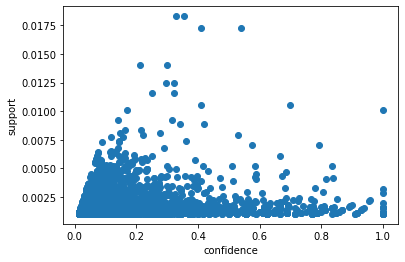

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(rules.confidence,rules.support);plt.xlabel("confidence");plt.ylabel("support")

Text(0, 0.5, 'support')

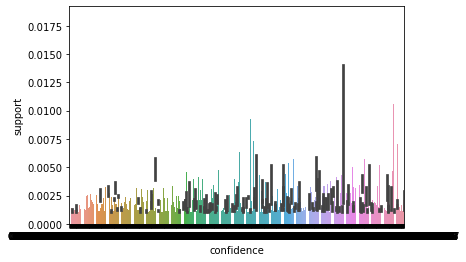

In [10]:
sns.barplot(x=rules.confidence,y=rules.support);plt.xlabel("confidence");plt.ylabel("support")

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lift'>

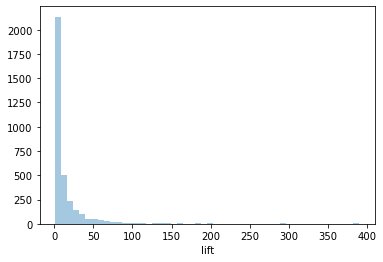

In [11]:
sns.distplot(rules.lift,bins=50,kde=False)

In [12]:
rules_confi=association_rules(frequent_itemsets,metric='confidence')
rules_confi

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_sausage),(0_frankfurter),0.010066,0.058973,0.010066,1.000000,16.956897,0.009472,inf
1,(5_butter),(4_whole milk),0.003660,0.015150,0.002949,0.805556,53.172073,0.002893,5.064943
2,(6_whole milk),(5_other vegetables),0.004982,0.006914,0.004067,0.816327,118.067227,0.004033,5.406801
3,(7_butter),(6_whole milk),0.001525,0.004982,0.001322,0.866667,173.952381,0.001314,7.462633
4,(8_whipped/sour cream),(7_yogurt),0.002135,0.004169,0.001729,0.809524,194.186992,0.001720,5.228114
...,...,...,...,...,...,...,...,...,...
56,"(4_root vegetables, 6_whole milk)",(5_other vegetables),0.001830,0.006914,0.001627,0.888889,128.562092,0.001614,8.937773
57,"(7_butter, 5_other vegetables)",(6_whole milk),0.001017,0.004982,0.001017,1.000000,200.714286,0.001012,inf
58,"(2_root vegetables, 4_whole milk, 1_tropical f...",(3_other vegetables),0.001322,0.025826,0.001118,0.846154,32.763477,0.001084,6.332130
59,"(2_tropical fruit, 6_whole milk, 3_pip fruit)",(5_other vegetables),0.001017,0.006914,0.001017,1.000000,144.632353,0.001010,inf


Text(0, 0.5, 'support')

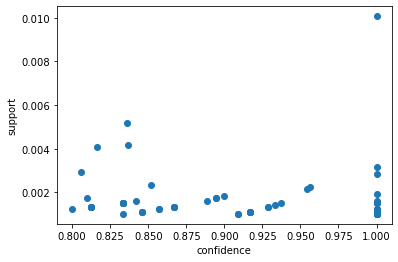

In [13]:
plt.scatter(rules_confi.confidence,rules_confi.support);plt.xlabel("confidence");plt.ylabel("support")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'support')

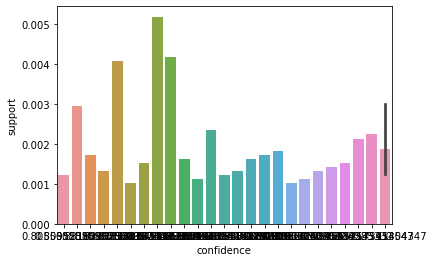

In [20]:
sns.barplot(rules_confi.confidence,rules_confi.support);plt.xlabel("confidence");plt.ylabel("support")

In [14]:
#NOW WE CHANGING min_support VALUE IN APRIORI ALGORITHM
frequent_patterns1=apriori(data,min_support=0.007,use_colnames=True)
frequent_patterns1

,support,itemsets
0,0.007117,(0_UHT-milk)
1,0.030910,(0_beef)
2,0.012303,(0_berries)
3,0.008134,(0_beverages)
4,0.018099,(0_bottled beer)
...,...,...
148,0.017285,"(3_whole milk, 2_other vegetables)"
149,0.008846,"(2_root vegetables, 3_other vegetables)"
150,0.007422,"(3_yogurt, 2_whole milk)"
151,0.010574,"(3_other vegetables, 4_whole milk)"


In [15]:
rules_lift=association_rules(frequent_patterns1,metric='lift')
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0_citrus fruit),(1_tropical fruit),0.046060,0.036096,0.011591,0.251656,6.971924,0.009929,1.288049
1,(1_tropical fruit),(0_citrus fruit),0.036096,0.046060,0.011591,0.321127,6.971924,0.009929,1.405181
2,(1_sausage),(0_frankfurter),0.010066,0.058973,0.010066,1.000000,16.956897,0.009472,inf
3,(0_frankfurter),(1_sausage),0.058973,0.010066,0.010066,0.170690,16.956897,0.009472,1.193683
4,(0_other vegetables),(1_whole milk),0.046772,0.066497,0.014032,0.300000,4.511468,0.010921,1.333575
5,(1_whole milk),(0_other vegetables),0.066497,0.046772,0.014032,0.211009,4.511468,0.010921,1.208161
6,(0_root vegetables),(1_other vegetables),0.029283,0.055923,0.008134,0.277778,4.967172,0.006497,1.307184
7,(1_other vegetables),(0_root vegetables),0.055923,0.029283,0.008134,0.145455,4.967172,0.006497,1.135945
8,(2_whole milk),(0_sausage),0.051449,0.083884,0.007321,0.142292,1.696299,0.003005,1.068098
9,(0_sausage),(2_whole milk),0.083884,0.051449,0.007321,0.087273,1.696299,0.003005,1.039249


Text(0, 0.5, 'support')

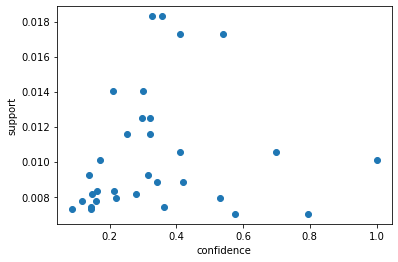

In [16]:
plt.scatter(rules_lift.confidence,rules_lift.support);plt.xlabel("confidence");plt.ylabel("support")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'support')

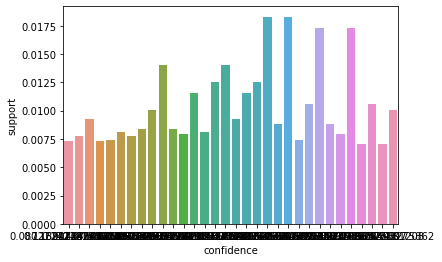

In [19]:
sns.barplot(rules_lift.confidence,rules_lift.support);plt.xlabel("confidence");plt.ylabel("support")

In [17]:
rules_confi2=association_rules(frequent_patterns1,metric='confidence')
rules_confi2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_sausage),(0_frankfurter),0.010066,0.058973,0.010066,1.0,16.956897,0.009472,inf
